# CS145: Project 2 | Understanding Chicago Crime

## Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* *Bryan Monge Serrano, 06455229*
* *Erick Angelo Ramirez, 06527093, erick25*

## Project Overview

---

*Chicago is a vibrant city filled with life. However, it is plagued with crime. This project aims to understand and draw patterns between crime, public transit ridership, businesses, and taxi pickups/dropoffs. Understanding the patterns that underlie the reality in Chicago will be crucial towards accurrately predicting crime.

For instance, 2022 saw over 40,000 incidents in the city. This research aims to explore crime will focus on how crime is spatially and temporally distributed, and what location indicators predict crime, i.e. a lack of business licenses.

Beyond this, we aim to answer the following questions:

  - Where does crime occur most often? When? What type?
  - How does crime change over time?
  - What factors are indicative of crime ?
  - Can we predict crime based off of date, community area, time of day?
  
DATA:
For this project, I am using 4 tables:
- `Business-Licenses` (375.94 MB): Information about business licenses issued by the Department of Business Affairs and Consumer Protection in the City of Chicago from 2002 to the present.  
- `CTA-Ridership` (48.41 MB): Information about daily totals of ridership, by station entry, for each 'L' station dating back to 2001.
- `chicago-taxi` from Chicago Taxi dataset in BigQuery Public Data (76.75 GB): Information about taxi pickups and dropoffs in Chicago.
- `crime` from Chicago Crime dataset in BigQuery Public Data (1.61 GB): Information about crime in Chicago.

We also two other datasets:
- `census_bureau_acs` (3.0 GB): US Census Data that describes populations, education level, racial makeup, and other information about different geographies in the us.
- `geo_us_boundaries` (5.7 GB) Information that includes the polygons of different geographies

Total Dataset size: 87.48435 GB *

---


## Business-Licenses (375.94 MB)

#### What are Business Licenses?
The Business Licenses contians information about the licenses in Chicago. These licenses are indicative of the economic wellbeing of a region. The dataset includes information, such the type of business (qualitative) and zip code of the license.

####  Dataset
`ID` (string). "A calculated ID for each record."
The primary key of this table is the unique attributes (ID). This is because there may be rows with overlapping License ID due to renewals or reapplications:
- `License ID` (float):
An internal database ID for each record. Each license can have multiple records as it goes through renewals and other transactions. See the LICENSE NUMBER field for the number generally known to the public and used in most other data sources that refer to the license.
- `Account Number` (float): The identifier of the account of the application, similar to USER ID. The account number of the business owner, which will stay consistent across that owner's licenses and can be used to find the owner in the Business Owners dataset.
- `Site Number` (float): An internal database ID indicating the location of this licensed business to account for business owners with more than one location.
- `Legal Name` (string): Name of the business
- `Doing Business As Name`(string): Name of the business
- `Address` (string): Address of the business
- `State` (string): State of the business
- `Zip Code` (string): Zip Code of the business
-`Ward` (float): The ward where the business is located.
- `Precinct` (float): The precinct within the ward where the business is located. Note the the same precinct numbers exist in multiple wards.
- `Ward Precinct` (string): The ward and precinct where the business is located. This column can be used to filter by precinct more easily across multiple wards.
- `Police District` (float): The police district of the business
- `License Code` (float): A code for the type of license. Each code value corresponds to a specific LICENSE DESCRIPTION value.


The table has 1,149,401 rows. We will primarily index this table with (Zip Code or Longitude and Lattitude), since our census data is based of either zip code or census tracts.


## CTA-Ridership Dataset (48.41 MB)

### Tables
This dataset provides information about daily totals of ridership at Chicago Transit Authority (CTA) 'L' stations, dating back to 2001. Below are the details of its key variables:

### Table Schema
- `station_id` (INTEGER): A unique identifier for each station.
- `stationname` (STRING): The name of the station.
- `date` (DATE): The date for which the ridership data is recorded.
- `daytype` (STRING): The type of day (e.g., weekday, weekend, or holiday).
- `rides` (INTEGER): The total number of rides recorded at the station on the
 given date.

### Details
- **Rows**: 1.24 million rows
- **Columns**: 5 columns

### Data Description
Each row represents a unique combination of station_id and date, making (station_id, date) the primary key for the table. The dataset is useful for analyzing ridership trends over time and comparing patterns by station, day type, or other temporal variables.

### Reasons Behind Dataset Choice
This dataset is valuable for studying public transportation usage in Chicago, offering clean and well-structured information for time series analysis and spatial comparisons between stations.

## Chicago-Taxi Dataset (76.75 GB)

#### Tables
This dataset contains detailed information about taxi pickups and dropoffs in Chicago. It includes data on trip durations, distances, fares, tips, and locations. Below are the details of its key variables:

#### Table Schema
- `unique_key`: A unique identifier for each taxi trip (STRING).
- `taxi_id`: A unique identifier for the taxi vehicle (STRING).
- `trip_start_timestamp`: The start time of the trip, rounded to the nearest 15 minutes (TIMESTAMP).
- `trip_end_timestamp`: The end time of the trip, rounded to the nearest 15 minutes (TIMESTAMP).
- `trip_seconds`: The duration of the trip in seconds (INTEGER).
- `trip_miles`: The distance covered during the trip in miles (FLOAT).
- `pickup_census_tract`: The Census Tract where the trip began. Some Census Tracts may be hidden for privacy (INTEGER).
- `dropoff_census_tract`: The Census Tract where the trip ended. Some Census Tracts may be hidden for privacy (INTEGER).
- `pickup_community_area`: The Community Area where the trip began (INTEGER).
- `dropoff_community_area`: The Community Area where the trip ended (INTEGER).
- `fare`: The fare for the trip (FLOAT).
- `tips`: The tip amount for the trip (FLOAT).
- `tolls`: The toll charges for the trip (FLOAT).
- `extras`: Extra charges for the trip (FLOAT).
- `trip_total`: The total cost of the trip, including fare, tips, tolls, and extras (FLOAT).
- `payment_type`: The payment type for the trip (STRING).
- `company`: The taxi company that provided the service (STRING).
- `pickup_latitude`: The latitude of the pickup location, typically the center of the Census Tract or Community Area (FLOAT).
- `pickup_longitude`: The longitude of the pickup location, typically the center of the Census Tract or Community Area (FLOAT).
- `pickup_location`: A descriptive location of the pickup area (STRING).
- `dropoff_latitude`: The latitude of the dropoff location, typically the center of the Census Tract or Community Area (FLOAT).
- `dropoff_longitude`: The longitude of the dropoff location, typically the center of the Census Tract or Community Area (FLOAT).
- `dropoff_location`: A descriptive location of the dropoff area (STRING).

### Details
- **Rows**: 212 million rows
- **Columns**: 23 columns
- **Each row represents** : A Trip

### Reasons Behind Dataset Choice
This dataset provides detailed, granular data that is ideal for spatial analysis, time-series studies, and financial modeling of taxi services in Chicago. Its extensive coverage of trips allows for in-depth insights into the city's transportation system.


## Chicago Crime (1.61 GB)

This dataset reflects reported incidents of crime (excluding murders, where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. To protect the privacy of crime victims, addresses are shown at the block level only, and specific locations are not identified. The dataset may contain preliminary information supplied by reporting parties, which has not been verified and may change based on further investigation. Errors may exist, and the Chicago Police Department does not guarantee the accuracy or completeness of the information. Notably, the dataset is updated daily.


#### Table Schema:
1. `unique_key` (`INTEGER`): Unique identifier for the record.
2. `case_number` (`STRING`): Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
3. `date` (`TIMESTAMP`): The date the incident occurred, sometimes an estimate.
4. `block` (`STRING`): The partially redacted address where the incident occurred, placed on the same block as the actual address.
5. `iucr` (`STRING`): Illinois Uniform Crime Reporting code, linked to the Primary Type and Description.
6. `primary_type` (`STRING`): The primary description of the IUCR code.
7. `description` (`STRING`): The secondary description of the IUCR code, a subcategory of the primary description.
8. `location_description` (`STRING`): Description of the location where the incident occurred.
9. `arrest` (`BOOLEAN`): Indicates whether an arrest was made.
10. `domestic` (`BOOLEAN`): Indicates whether the incident was domestic-related.
11. `beat` (`INTEGER`): The police beat where the incident occurred.
12. `district` (`INTEGER`): The police district where the incident occurred.
13. `ward` (`INTEGER`): The ward (City Council district) where the incident occurred.
14. `community_area` (`INTEGER`): The community area where the incident occurred (77 community areas in Chicago).
15. `fbi_code` (`STRING`): Indicates the crime classification as per the FBI's National Incident-Based Reporting System.
16. `x_coordinate` (`FLOAT`): The x coordinate of the location where the incident occurred (shifted for partial redaction).
17. `y_coordinate` (`FLOAT`): The y coordinate of the location where the incident occurred (shifted for partial redaction).
18. `year` (`INTEGER`): The year the incident occurred.
19. `updated_on` (`TIMESTAMP`): The date and time the record was last updated.
20. `latitude` (`FLOAT`): The latitude of the location (shifted for partial redaction).
21. `longitude` (`FLOAT`): The longitude of the location (shifted for partial redaction).
22. `location` (`STRING`): The location where the incident occurred in a format usable for geographic operations (shifted for partial redaction).

#### Links for Additional Information:
- [Illinois Uniform Crime Reporting (IUCR) codes](https://data.cityofchicago.org/d/c7ck-438e)
- [Crime classifications by FBI code](https://gis.chicagopolice.org/pages/crime_details)
- [Community Areas in Chicago](https://data.cityofchicago.org/d/cauq-8yn6)
- [Police Districts in Chicago](https://data.cityofchicago.org/d/fthy-xz3r)
- [Police Beats in Chicago](https://data.cityofchicago.org/d/aerh-rz74)
- [Chicago Wards](https://data.cityofchicago.org/d/sp34-6z76)

### Details
- **Rows**: 8.2 million rows
- **Columns**: 22 columns
- **Each row represents** : A reported crime incident

### Reasons Behind Dataset Choice
This dataset provides detailed information about the crimes reported in Chicago, which can be used for analysis of crime patterns, trends, and geographic distribution. The comprehensive nature and the inclusion of key variables like the location, type of crime, and arrests make this dataset suitable for various types of analysis in crime prevention and urban studies.


## Census Dataset (1.5 GB)

The census dataset consists of over 50 tables, most of which we won't describe in detail here as they are not relevant to this project.

The key difference among these tables are primarily based on the following factors:

- **Location Granularity**: The dataset is divided by different geographical levels, such as state, county, block group, zip code, or census tract.
- **Year**: The specific year the census data was collected.
- **1-Year vs 5-Year Data**: The 1-year tables represent data from the annual census, while the 5-year tables are based on the five-year census data.

For this project, we will primarily focus on the `zip_codes_2018_5yr` table, which contains detailed census data at the zip code level for 2018, using the 5-year sample size. This is the most recent available 5-year census data at the zip code level and provides a more granular view compared to county-level data, which is useful for localized analysis. The table includes a wide range of demographic and socio-economic variables that can provide insights into specific zip code-level trends and patterns.

This table contains roughly 33,000 rows, each corresponding to a zip code, with numerous attributes including population size, age and gender breakdowns, income distribution, ethnic composition, and housing data.

The primary key of the table is `geo_id`, which corresponds to the specific zip code identifier, similar to the format used in other census datasets. This key is used to link demographic information across the various attributes, such as population totals, median age, household income, housing types, and more.


# geo_us_boundaries Dataset (5.7 GB)

The `geo_us_boundaries` dataset contains various tables representing geographical boundaries within the United States. The tables differ primarily in the granularity of location and the type of geographic boundaries represented. For this project, we focus on the **zip_codes** table, which contains detailed information about the geographic boundaries for each zip code in the U.S.

This table is organized by zip code level, providing a variety of geographic attributes and boundary data useful for spatial analysis and mapping. Unlike other datasets that might be organized by state or county, the zip code table allows for more localized, specific analyses.

The **zip_codes** table includes the following key data:
- **Zip Code**: The unique identifier for each zip code in the U.S.
- **Geo_ID**: A unique identifier that can be used to link this dataset to other datasets for further analysis.
- **Latitude and Longitude**: Coordinates of the central location within the zip code area.
- **Geographic Boundaries**: Detailed polygonal data that outlines the exact boundaries of each zip code area.
- **Region/State Info**: Includes the associated state and region where the zip code is located.

The table is useful for any analysis that requires zip code-level geographical data, including demographic studies, spatial analysis, and mapping exercises. The data can also be integrated with other datasets to provide insights into regional or community-level trends.

This table includes around 33,000 rows, each representing one zip code area. The primary key for the table is the `zip_code`, which serves as the unique identifier for each geographic region in the dataset.

The zip code boundary data in this table is highly accurate and precise, making it valuable for applications involving geographic information systems (GIS), mapping, and other spatial data visualizations. **The most important attribue of the amto


# Relating The Tables

The datasets used in this project come from different sources, but they share common identifiers that allow us to join them together. By focusing on geographic identifiers like **zip_code**, we can create meaningful connections between these datasets.

### Key Relationships:
- **zip_code**: The **zip_codes** table in the **geo_us_boundaries** dataset contains information on geographic boundaries at the zip code level. This can be linked to the **zip_codes_2018_5yr** census table, which has population and demographic data at the same level. Both tables use **geo_id** or **zip_code** to allow this connection.
- **longitude and latitudee**: These features are universally available across the datatables. As such, they are great as they allow me to easily in point what type of crime or commuters are in a certain zip code.
  


## Analysis of Dataset

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "cs145-fall2024-project2"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
import pandas as pd
import matplotlib

---

*TODO: Analysis of your dataset*

----

In [ ]:
%%bigquery --project $project_id

-- Filter Businesses to the City of Chicago

WITH FilteredBusiness AS (
    SELECT DISTINCT
        B.`LEGAL NAME` AS business_name,
        B.LATITUDE AS business_latitude,
        B.LONGITUDE AS business_longitude,
        B.`ZIP CODE` AS business_zipcode,
        B.WARD AS business_ward,
        B.PRECINCT AS business_precinct,
        B.`POLICE DISTRICT` AS business_policedistrict
    FROM
        `cs145-fall2024-project2.chicago_data.Business-Licenses` AS B
    WHERE
        LOWER(CITY) = "chicago"
)
SELECT
    COUNT(*) AS row_count
FROM
    FilteredBusiness;

Query is running:   0%|          |

Downloading:   0%|          |

,row_count
0,224325


In [ ]:
%%bigquery --project $project_id

-- Filter the Business Lisence Data so that it is filtered to the
-- Chicago City and makes sure there are no duplicate businesses.

WITH FilteredBusiness AS (
    SELECT DISTINCT
        B.`LEGAL NAME` AS business_name,
        B.LATITUDE AS business_latitude,
        B.LONGITUDE AS business_longitude,
        B.`ZIP CODE` AS business_zipcode,
        B.WARD AS business_ward,
        B.PRECINCT AS business_precinct,
        B.`POLICE DISTRICT` AS business_policedistrict
    FROM
        `cs145-fall2024-project2.chicago_data.Business-Licenses` AS B
    WHERE
        LOWER(CITY) = "chicago"
        AND B.`LEGAL NAME` IS NOT NULL
        AND B.`LATITUDE` IS NOT NULL
        AND B.`LONGITUDE` IS NOT NULL
        AND B.`ZIP CODE` IS NOT NULL
        AND B.WARD IS NOT NULL
        AND B.PRECINCT IS NOT NULL
        AND B.`POLICE DISTRICT` IS NOT NULL
)
SELECT
    business_name,
    business_latitude,
    business_longitude
    business_zipcode,
    business_ward,
    business_precinct,
    business_policedistrict
FROM
    FilteredBusiness
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,business_name,business_latitude,business_zipcode,business_ward,business_precinct,business_policedistrict
0,"PAPIER D' COULEUR, INC.",41.892094,-87.61157,42,11,18
1,CHICAGO SIGHT SEEING CO,41.892094,-87.61157,42,11,18
2,"ARRIETA, INC.",41.892094,-87.61157,42,11,18
3,EARTHLY ELEMENTS,41.892094,-87.61157,42,11,18
4,KEN FOSTER,41.892094,-87.61157,42,11,18
5,MAYE SUTHERLAND,41.892094,-87.61157,42,11,18
6,CHICAGO SOAP COMPANY,41.892094,-87.61157,42,11,18
7,"IRISH IMPORTS, INC.",41.892094,-87.61157,42,11,18
8,"AYUSH ENTERPRISES, INC.",41.892094,-87.61157,42,11,18
9,AIR ONE INC,41.892094,-87.61157,42,11,18


In [ ]:
%%bigquery --project $project_id

-- Filter to non-null location data.
-- This only reduces the number of rows by 224325 - 221825 = 2500

WITH FilteredBusiness AS (
    SELECT DISTINCT
        B.`LEGAL NAME` AS business_name,
        B.LATITUDE AS business_latitude,
        B.LONGITUDE AS business_longitude,
        B.`ZIP CODE` AS business_zipcode,
        B.WARD AS business_ward,
        B.PRECINCT AS business_precinct,
        B.`POLICE DISTRICT` AS business_policedistrict
    FROM
        `cs145-fall2024-project2.chicago_data.Business-Licenses` AS B
    WHERE
        LOWER(CITY) = "chicago"
        AND B.`LEGAL NAME` IS NOT NULL
        AND B.`LATITUDE` IS NOT NULL
        AND B.`LONGITUDE` IS NOT NULL
        AND B.`ZIP CODE` IS NOT NULL
        AND B.WARD IS NOT NULL
        AND B.PRECINCT IS NOT NULL
        AND B.`POLICE DISTRICT` IS NOT NULL
)
SELECT
    COUNT(*) AS row_count
FROM
    FilteredBusiness;

Query is running:   0%|          |

Downloading:   0%|          |

,row_count
0,221825


In [ ]:
%%bigquery --project $project_id

SELECT
    `primary_type` AS crime_type,
    COUNT(*) AS total_crimes,
    RANK() OVER (ORDER BY COUNT(*) DESC) AS rank
FROM
    `bigquery-public-data.chicago_crime.crime`
GROUP BY
    `primary_type`
ORDER BY
    rank;

Query is running:   0%|          |

Downloading:   0%|          |

,crime_type,total_crimes,rank
0,THEFT,1737244,1
1,BATTERY,1495757,2
2,CRIMINAL DAMAGE,934154,3
3,NARCOTICS,756838,4
4,ASSAULT,544606,5
5,OTHER OFFENSE,509771,6
6,BURGLARY,436942,7
7,MOTOR VEHICLE THEFT,415184,8
8,DECEPTIVE PRACTICE,372773,9
9,ROBBERY,308775,10


In [ ]:
%%bigquery --project $project_id

SELECT
    *
FROM
    `cs145-fall2024-project2.chicago_data.zip_codes`
WHERE
    zip_code = "60601"

Query is running:   0%|          |

Downloading:   0%|          |

,zip_code,city,county,state_fips_code,state_code,state_name,fips_class_code,mtfcc_feature_class_code,functional_status,area_land_meters,area_water_meters,internal_point_lat,internal_point_lon,internal_point_geom,zip_code_geom
0,60601,Chicago city,"Cook County, DuPage County",17,IL,Illinois,B5,G6350,S,934221.0,61223.0,41.885155,-87.621512,POINT(-87.6215122 41.885155),"POLYGON((-87.633965 41.886985, -87.633964 41.8..."


In [ ]:
%%bigquery --project $project_id

SELECT
    zip_code, zip_code_geom
FROM
    `cs145-fall2024-project2.chicago_data.zip_codes`
WHERE
    state_code = "IL"
    AND city = "Chicago city"

Query is running:   0%|          |

Downloading:   0%|          |

,zip_code,zip_code_geom
0,60606,"POLYGON((-87.641378 41.888632, -87.641374 41.8..."
1,60660,"POLYGON((-87.681391 41.997874, -87.681413 41.9..."
2,60622,"POLYGON((-87.706903 41.906477, -87.706897 41.9..."
3,60623,"POLYGON((-87.739932 41.86596, -87.739931 41.86..."
4,60611,"POLYGON((-87.628628 41.90318, -87.628358 41.90..."
5,60636,"POLYGON((-87.686653 41.757491, -87.686682 41.7..."
6,60624,"POLYGON((-87.741203 41.895093, -87.741186 41.8..."
7,60620,"POLYGON((-87.687521 41.740177, -87.687448 41.7..."
8,60641,"POLYGON((-87.767123 41.956832, -87.76711 41.95..."
9,60613,"POLYGON((-87.678866 41.957806, -87.67886 41.95..."


In [ ]:
%%bigquery --project $project_id

WITH FilteredZipCodes AS (
    SELECT
        zip_code,
        zip_code_geom,
    FROM
        `cs145-fall2024-project2.chicago_data.zip_codes`
    WHERE
        state_code = "IL"
        AND city = "Chicago city"
),
CrimeWithCoordinates AS (
    SELECT
        unique_key,
        primary_type,
        description,
        date,
        latitude,
        longitude,
        ST_GEOGPOINT(longitude, latitude) AS crime_geom
    FROM
        `bigquery-public-data.chicago_crime.crime`
    WHERE
        latitude IS NOT NULL
        AND longitude IS NOT NULL
),
CrimeWithZip AS (
    SELECT
        c.unique_key,
        c.primary_type,
        c.description,
        c.date,
        z.zip_code
    FROM
        CrimeWithCoordinates c
    JOIN
        FilteredZipCodes z
    ON
        ST_WITHIN(c.crime_geom, z.zip_code_geom)
)
SELECT
    *
FROM
    CrimeWithZip
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,unique_key,primary_type,description,date,zip_code
0,12847134,THEFT,$500 AND UNDER,2022-10-01 10:25:00+00:00,60608
1,12246037,BURGLARY,FORCIBLE ENTRY,2020-12-15 16:00:00+00:00,60608
2,11138788,BURGLARY,FORCIBLE ENTRY,2017-11-03 11:55:00+00:00,60608
3,3798374,BURGLARY,FORCIBLE ENTRY,2005-02-06 21:00:00+00:00,60608
4,9663616,THEFT,OVER $500,2014-06-21 21:00:00+00:00,60608
5,10360241,THEFT,OVER $500,2015-12-26 07:00:00+00:00,60608
6,11987866,THEFT,OVER $500,2020-01-29 16:02:00+00:00,60608
7,11397651,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE W-VIN",2018-07-30 22:00:00+00:00,60608
8,11276495,DECEPTIVE PRACTICE,STOLEN PROP: BUY/RECEIVE/POS.,2018-04-05 12:02:00+00:00,60608
9,12214836,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,2020-11-06 22:00:00+00:00,60608


In [ ]:
%%bigquery --project $project_id

WITH FilteredZipCodes AS (
    SELECT
        zip_code,
        zip_code_geom,
    FROM
        `cs145-fall2024-project2.chicago_data.zip_codes`
    WHERE
        state_code = "IL"
        AND city = "Chicago city"
),
CrimeWithCoordinates AS (
    SELECT
        unique_key,
        primary_type,
        description,
        date,
        latitude,
        longitude,
        ST_GEOGPOINT(longitude, latitude) AS crime_geom
    FROM
        `bigquery-public-data.chicago_crime.crime`
    WHERE
        latitude IS NOT NULL
        AND longitude IS NOT NULL
),
CrimeWithZip AS (
    SELECT
        c.unique_key,
        c.primary_type,
        c.description,
        c.date,
        z.zip_code
    FROM
        CrimeWithCoordinates c
    JOIN
        FilteredZipCodes z
    ON
        ST_WITHIN(c.crime_geom, z.zip_code_geom) -- No need to convert z.zip_code_geom
)
SELECT
    zip_code,
    COUNT(*) AS total_crimes,
    RANK() OVER (ORDER BY COUNT(*) DESC) AS rank
FROM
    CrimeWithZip
GROUP BY
    zip_code
ORDER BY
    total_crimes DESC

Query is running:   0%|          |

Downloading:   0%|          |

,zip_code,total_crimes,rank
0,60628,348844,1
1,60620,348411,2
2,60619,307232,3
3,60624,306349,4
4,60644,300347,5
5,60623,291726,6
6,60617,291404,7
7,60651,275248,8
8,60636,270754,9
9,60637,263601,10


In [ ]:
query = """
WITH FilteredZipCodes AS (
    SELECT
        zip_code,
        zip_code_geom
    FROM
        `cs145-fall2024-project2.chicago_data.zip_codes`
    WHERE
        state_code = "IL"
        AND city = "Chicago city"
),
CrimeWithCoordinates AS (
    SELECT
        unique_key,
        primary_type,
        description,
        date,
        latitude,
        longitude,
        ST_GEOGPOINT(longitude, latitude) AS crime_geom
    FROM
        `bigquery-public-data.chicago_crime.crime`
    WHERE
        latitude IS NOT NULL
        AND longitude IS NOT NULL
),
CrimeWithZip AS (
    SELECT
        c.unique_key,
        c.primary_type,
        c.description,
        c.date,
        z.zip_code,
        z.zip_code_geom
    FROM
        CrimeWithCoordinates c
    JOIN
        FilteredZipCodes z
    ON
        ST_WITHIN(c.crime_geom, z.zip_code_geom) -- No need to convert z.zip_code_geom
)
SELECT
    zip_code,
    COUNT(*) AS total_crimes,
    RANK() OVER (ORDER BY COUNT(*) DESC) AS rank
FROM
    CrimeWithZip
GROUP BY
    zip_code
ORDER BY
    total_crimes DESC
"""

crime_data = pd.DataFrame(client.query(query).to_dataframe())

In [ ]:
query = """
    SELECT
        zip_code,
        zip_code_geom
    FROM
        `cs145-fall2024-project2.chicago_data.zip_codes`
    WHERE
        state_code = "IL"
        AND city = "Chicago city"
"""

zip_data = pd.DataFrame(client.query(query).to_dataframe())

In [ ]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# Convert geometries from WKT to Shapely Polygons
zip_data['zip_code_geom'] = zip_data['zip_code_geom'].apply(wkt.loads)

# Merge crime data with zip code geometries
merged_data = zip_data.merge(crime_data, on='zip_code', how='left')

# Fill missing values for total_crimes (e.g., zip codes with no crimes)
merged_data['total_crimes'] = merged_data['total_crimes'].fillna(0)

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(merged_data, geometry='zip_code_geom')

# Ensure the GeoDataFrame is in a valid coordinate system
geo_df.set_crs(epsg=4326, inplace=True)


,zip_code,zip_code_geom,total_crimes,rank
0,60606,"POLYGON ((-87.64138 41.88863, -87.64137 41.888...",25327,44
1,60660,"POLYGON ((-87.68139 41.99787, -87.68141 41.997...",61620,41
2,60622,"POLYGON ((-87.7069 41.90648, -87.7069 41.9063,...",155145,20
3,60623,"POLYGON ((-87.73993 41.86596, -87.73993 41.865...",291726,6
4,60611,"POLYGON ((-87.62863 41.90318, -87.62836 41.902...",104539,32
5,60636,"POLYGON ((-87.68665 41.75749, -87.68668 41.757...",270754,9
6,60624,"POLYGON ((-87.7412 41.89509, -87.74119 41.8949...",306349,4
7,60620,"POLYGON ((-87.68752 41.74018, -87.68745 41.737...",348411,2
8,60641,"POLYGON ((-87.76712 41.95683, -87.76711 41.956...",128246,26
9,60613,"POLYGON ((-87.67887 41.95781, -87.67886 41.957...",80059,34


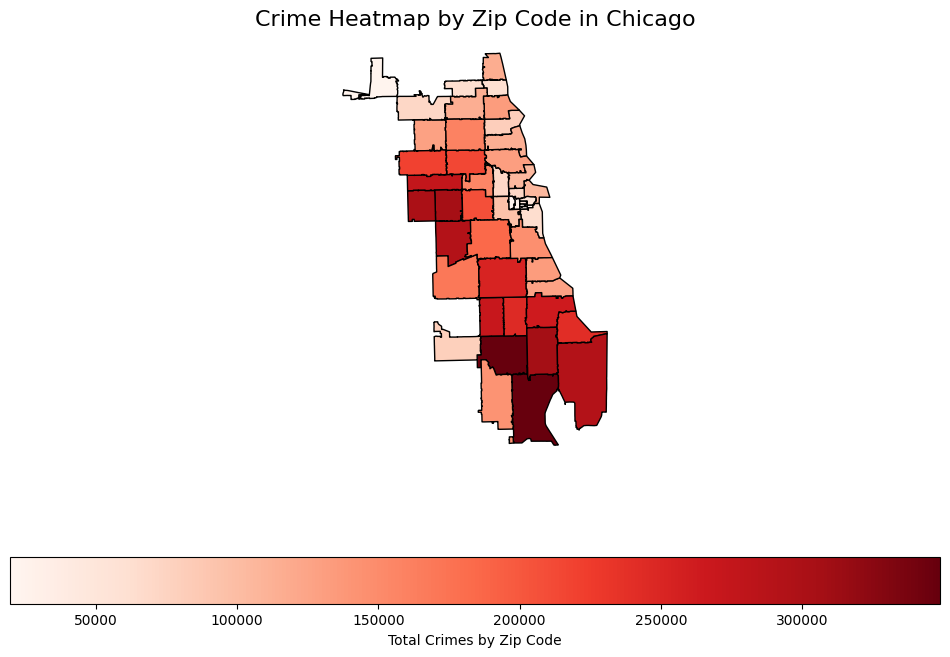

In [ ]:
# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Use the `plot()` method with a colormap for total crimes
geo_df.plot(
    column='total_crimes',
    cmap='Reds',
    legend=True,
    edgecolor='black',
    legend_kwds={
        'label': "Total Crimes by Zip Code",
        'orientation': "horizontal"
    },
    ax=ax
)

# Add a title
ax.set_title('Crime Heatmap by Zip Code in Chicago', fontsize=16)

# Remove axes for a cleaner map
ax.axis('off')

# Show the plot
plt.show()


In [ ]:
import folium
import geopandas as gpd
import pandas as pd
from folium.plugins import HeatMap
import json

# Create the base map centered on Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Merge the crime data with zip data using zip_code
merged_data = pd.merge(crime_data, zip_data, on='zip_code', how='left')

# Prepare GeoJSON features for the heatmap
geojson_data = []
for _, row in merged_data.iterrows():
    # Add a feature for each zip code with its crime count as properties
    feature = {
        "type": "Feature",
        "geometry": json.loads(row['zip_code_geom']),
        "properties": {
            "zip_code": row['zip_code'],
            "total_crimes": row['total_crimes']
        }
    }
    geojson_data.append(feature)

# Create the GeoJSON object
geojson_object = {
    "type": "FeatureCollection",
    "features": geojson_data
}

# Add GeoJSON data to the map with a color scale based on crime count
folium.GeoJson(
    geojson_object,
    name="Zip Code Heatmap",
    style_function=lambda feature: {
        'fillColor': '#ff0000' if feature['properties']['total_crimes'] > 100 else '#ffcc00',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    }
).add_to(chicago_map)

# Display the map
chicago_map


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
crime_data

,zip_code,total_crimes,rank
0,60628,348844,1
1,60620,348411,2
2,60619,307232,3
3,60624,306349,4
4,60644,300347,5
5,60623,291726,6
6,60617,291404,7
7,60651,275248,8
8,60636,270754,9
9,60637,263601,10


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# Convert the geometry column from WKT to Shapely Polygons
zip_data['zip_code_geom'] = zip_data['zip_code_geom'].apply(wkt.loads)

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(crime_data, geometry='zip_code_geom')

# Plot the zip codes, coloring by total crimes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geo_df.plot(column='total_crimes', cmap='Reds', legend=True,
            legend_kwds={'label': "Total Crimes by Zip Code"},
            edgecolor="black", ax=ax)
ax.set_title('Crime Heatmap by Zip Code in Chicago', fontsize=16)
plt.axis('off')
plt.show()


KeyError: 'zip_code_geom'

In [ ]:
import pandas as pd
import geopandas as gpd
import folium

# Load the GeoJSON file with Chicago zip code boundaries
zip_geo = gpd.read_file('/content/zipcodes.geojson')

# Merge crime data with GeoJSON by zip code
zip_geo = zip_geo.merge(crime_data, left_on='zip_code', right_on='ZIP', how='left')
zip_geo['total_crimes'] = zip_geo['total_crimes'].fillna(0)  # Fill missing crime data with 0

# Create a base map centered on Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add a choropleth layer
choropleth = folium.Choropleth(
    geo_data=zip_geo,
    data=crime_data,
    columns=['zip_code', 'total_crimes'],
    key_on='feature.properties.zip_code',  # Adjust according to your GeoJSON structure
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Crimes by Zip Code'
).add_to(m)

# Add tooltips
folium.GeoJsonTooltip(
    fields=['zip_code', 'total_crimes'],
    aliases=['ZIP Code', 'Total Crimes'],
).add_to(choropleth.geojson)

# Save map to an HTML file or display it
m.save('chicago_crime_heatmap.html')


KeyError: 'ZIP'

In [ ]:
# client = bigq?uery.Client()

# SQL query
query = """
WITH CrimeWithCoordinates AS (
    SELECT
        unique_key,
        primary_type,
        description,
        date,
        latitude,
        longitude,
        ST_GEOGPOINT(longitude, latitude) AS crime_geom
    FROM
        `bigquery-public-data.chicago_crime.crime`
    WHERE
        latitude IS NOT NULL
        AND longitude IS NOT NULL
),
CrimeWithZip AS (
    SELECT
        c.unique_key,
        c.primary_type,
        c.description,
        c.date,
        z.zip_code
    FROM
        CrimeWithCoordinates c
    JOIN
        `cs145-fall2024-project2.chicago_data.zip_codes` z
    ON
        ST_WITHIN(c.crime_geom, z.zip_code_geom) -- No need to convert z.zip_code_geom
)
SELECT
    *
FROM
    CrimeWithZip
LIMIT 10;
"""

query = """
SELECT
    `primary_type` AS crime_type,
    COUNT(*) AS total_crimes,
    RANK() OVER (ORDER BY COUNT(*) DESC) AS rank
FROM
    `bigquery-public-data.chicago_crime.crime`
GROUP BY
    `primary_type`
ORDER BY
    rank;
"""

# Run the query and store the result in a DataFrame
query_job = client.query(query)
data = query_job.to_dataframe()

# Display the first few rows of the data
print(data.head())


        crime_type  total_crimes  rank
0            THEFT       1737244     1
1          BATTERY       1495757     2
2  CRIMINAL DAMAGE        934154     3
3        NARCOTICS        756838     4
4          ASSAULT        544606     5


In [ ]:
%%bigquery --project $project_id

WITH FilteredBusinesses AS (
    SELECT DISTINCT
        B.`LEGAL NAME` AS business_name,
        B.`LICENSE DESCRIPTION` AS business_type,
        B.LATITUDE AS business_latitude,
        B.LONGITUDE AS business_longitude,
        B.`ZIP CODE` AS business_zipcode,
        B.WARD AS business_ward,
        B.PRECINCT AS business_precinct,
        B.`POLICE DISTRICT` AS business_policedistrict
    FROM
        `cs145-fall2024-project2.chicago_data.Business-Licenses` AS B
    WHERE
        LOWER(CITY) = "chicago"
        AND B.`LEGAL NAME` IS NOT NULL
        AND B.`LATITUDE` IS NOT NULL
        AND B.`LONGITUDE` IS NOT NULL
        AND B.`ZIP CODE` IS NOT NULL
        AND B.WARD IS NOT NULL
        AND B.PRECINCT IS NOT NULL
        AND B.`POLICE DISTRICT` IS NOT NULL
),
BusinessCrimeJoin AS (
    SELECT
        b.business_name,
        b.business_zipcode,
        b.business_latitude,
        b.business_longitude,
        b.business_type,
        c.primary_type AS crime_type,
        c.description AS crime_description,
        c.date AS crime_date,
        c.latitude AS crime_latitude,
        c.longitude AS crime_longitude
    FROM
        FilteredBusinesses b
    JOIN
        `bigquery-public-data.chicago_crime.crime` c
    ON
        ABS(b.business_latitude - c.latitude) < 0.01
        AND ABS(b.business_longitude - c.longitude) < 0.01
    WHERE
        c.date > "2023-01-01"
)
SELECT
    business_type,
    crime_type,
    COUNT(*) AS crime_count
FROM
    BusinessCrimeJoin
GROUP BY
    business_type, crime_type
ORDER BY
    crime_count DESC;

Executing query with job ID: af2c627f-31cf-4b49-b147-9aeb30341d73
Query executing: 1.45s

KeyboardInterrupt: 

In [ ]:
%%bigquery --project $project_id

-- Joining Crime and License Data

SELECT
    b.`BUSINESS ACTIVITY` AS business_activity,
    COUNT(c.unique_key) AS num_crimes_nearby
FROM
    `cs145-fall2024-project2.chicago_data.Business-Licenses` b
JOIN
    `bigquery-public-data.chicago_crime.crime` c
ON
    ABS(b.LATITUDE - c.latitude) < 0.01
    AND ABS(b.LONGITUDE - c.longitude) < 0.01
WHERE
    c.date > "2023-01-01"
GROUP BY
    b.`BUSINESS ACTIVITY`
ORDER BY
    num_crimes_nearby DESC;

Executing query with job ID: 6e7da88d-1657-4341-8546-15e6723fcb28
Query executing: 1.45s

KeyboardInterrupt: 

## Data Exploration

---

*TODO: Exploring your questions, with appropriate visualizations*

---

## Modeling and Data Predictions

After exploring the data

Turning Longitude and Lattitude into zip codes for the crime dataset

In [ ]:
%%bigquery --project $project_id


SELECT
  c.unique_key,            -- Unique identifier for the crime
  c.case_number,           -- Case number
  c.date,                  -- Date and time of the crime
  c.block,                 -- Block where the crime occurred
  c.iucr,                  -- IUCR code
  c.primary_type,          -- Type of crime
  c.description,           -- Description of the crime
  c.location_description,  -- Location type (e.g., STREET, RESIDENCE)
  c.arrest,                -- Whether an arrest was made
  c.domestic,              -- Whether the crime was domestic-related
  c.beat,                  -- Police beat
  c.district,              -- Police district
  c.ward,                  -- Ward
  c.community_area,        -- Community area
  c.fbi_code,              -- FBI code for the crime
  c.x_coordinate,          -- X coordinate (projected)
  c.y_coordinate,          -- Y coordinate (projected)
  c.year,                  -- Year of the crime
  c.updated_on,            -- Timestamp of last update
  c.latitude,              -- Latitude of the crime
  c.longitude,             -- Longitude of the crime
  c.location,              -- Location in string format
  z.zip_code               -- ZIP code derived from spatial join
FROM
  `cs145-fall2024-project2.chicago_data.crime` AS c
JOIN
  `cs145-fall2024-project2.chicago_data.zip_codes` AS z
ON
  ST_CONTAINS(z.zip_code_geom, ST_GEOGPOINT(c.longitude, c.latitude))  -- Spatial containment
WHERE
  c.latitude IS NOT NULL
  AND c.longitude IS NOT NULL
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,zip_code
0,11743565,JC331744,2019-07-02 12:00:00+00:00,0000X E RANDOLPH ST,0890,THEFT,FROM BUILDING,DEPARTMENT STORE,False,False,...,32,06,1176582.0,1901291.0,2019,2019-07-19 15:40:03+00:00,41.884494,-87.627021,"(41.884493832, -87.627021129)",60601
1,13297680,JG528501,2023-12-02 23:30:00+00:00,0000X E WACKER DR,0890,THEFT,FROM BUILDING,HOTEL / MOTEL,False,False,...,32,06,1177009.0,1902589.0,2023,2023-12-10 15:41:08+00:00,41.888046,-87.625414,"(41.888045958, -87.625413826)",60601
2,8640856,HV315855,2012-06-02 18:00:00+00:00,003XX N MICHIGAN AVE,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,32,08B,1177242.0,1902518.0,2012,2016-02-04 06:33:39+00:00,41.887846,-87.624560,"(41.887845852, -87.624560336)",60601
3,11946022,JD109140,2020-01-08 20:30:00+00:00,001XX N STATE ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,32,06,1176338.0,1901346.0,2020,2020-01-15 15:42:00+00:00,41.884650,-87.627915,"(41.884650262, -87.627915459)",60601
4,11702202,JC281344,2019-05-28 03:45:00+00:00,001XX N MICHIGAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,32,07,1177276.0,1901405.0,2019,2019-06-30 15:41:21+00:00,41.884791,-87.624469,"(41.884790951, -87.624469241)",60601
5,6692798,HR107458,2009-01-05 19:00:00+00:00,002XX N CLARK ST,0890,THEFT,FROM BUILDING,RESTAURANT,False,False,...,32,06,1175500.0,1901787.0,2009,2016-02-04 06:33:39+00:00,41.885879,-87.630979,"(41.885879253, -87.630979425)",60601
6,11931301,JC558995,2019-12-24 08:30:00+00:00,0000X E RANDOLPH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,32,14,1176550.0,1901291.0,2019,2019-12-31 15:40:54+00:00,41.884495,-87.627139,"(41.884494554, -87.627138636)",60601
7,7627393,HS431823,2010-07-27 09:25:00+00:00,001XX W LAKE ST,0460,BATTERY,SIMPLE,CTA TRAIN,False,False,...,32,08B,1175334.0,1901735.0,2010,2018-02-10 15:50:01+00:00,41.885740,-87.631591,"(41.885740288, -87.631590568)",60601
8,11480091,JB480111,2018-10-18 09:40:00+00:00,0000X E RANDOLPH ST,0880,THEFT,PURSE-SNATCHING,DEPARTMENT STORE,False,False,...,32,06,1176582.0,1901291.0,2018,2018-10-25 16:16:26+00:00,41.884494,-87.627021,"(41.884493832, -87.627021129)",60601
9,2117533,HH351237,2002-05-05 12:15:00+00:00,001XX W LAKE ST,0820,THEFT,$500 AND UNDER,CTA PLATFORM,False,False,...,32,06,1175334.0,1901735.0,2002,2018-02-28 15:56:25+00:00,41.885740,-87.631591,"(41.885740288, -87.631590568)",60601


Now, let's add the zip codes to crime and keep the cleaned dataset

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE TABLE `cs145-fall2024-project2.chicago_data.crime` AS
SELECT
  c.unique_key,            -- Unique identifier for the crime
  c.case_number,           -- Case number
  c.date,                  -- Date and time of the crime
  c.block,                 -- Block where the crime occurred
  c.iucr,                  -- IUCR code
  c.primary_type,          -- Type of crime
  c.description,           -- Description of the crime
  c.location_description,  -- Location type (e.g., STREET, RESIDENCE)
  c.arrest,                -- Whether an arrest was made
  c.domestic,              -- Whether the crime was domestic-related
  c.beat,                  -- Police beat
  c.district,              -- Police district
  c.ward,                  -- Ward
  c.community_area,        -- Community area
  c.fbi_code,              -- FBI code for the crime
  c.x_coordinate,          -- X coordinate (projected)
  c.y_coordinate,          -- Y coordinate (projected)
  c.year,                  -- Year of the crime
  c.updated_on,            -- Timestamp of last update
  c.latitude,              -- Latitude of the crime
  c.longitude,             -- Longitude of the crime
  c.location,              -- Location in string format
  z.zip_code               -- ZIP code derived from spatial join
FROM
  `cs145-fall2024-project2.chicago_data.crime` AS c
JOIN
  `cs145-fall2024-project2.chicago_data.zip_codes` AS z
ON
  ST_CONTAINS(z.zip_code_geom, ST_GEOGPOINT(c.longitude, c.latitude))  -- Spatial containment
WHERE
  c.latitude IS NOT NULL
  AND c.longitude IS NOT NULL;

In [ ]:
%%bigquery --project $project_id

-- Aggregate Crime Data by ZIP Code and Year
WITH crime_data AS (
  SELECT
    zip_code,
    EXTRACT(YEAR FROM date) AS year,
    COUNT(*) AS crime_count,
    SUM(CASE WHEN arrest = TRUE THEN 1 ELSE 0 END) AS arrest_count,
    SUM(CASE WHEN domestic = TRUE THEN 1 ELSE 0 END) AS domestic_count,
    COUNT(DISTINCT primary_type) AS unique_crime_types
  FROM
    `project.dataset.crime`
  WHERE
    EXTRACT(YEAR FROM date) BETWEEN 2010 AND 2024
  GROUP BY
    zip_code, year
),

-- Aggregate Business License Data by ZIP Code and Year
business_data AS (
  SELECT
    zip_code,
    EXTRACT(YEAR FROM date_issued) AS year,
    COUNT(*) AS business_count,
    COUNT(DISTINCT business_activity) AS unique_business_types
  FROM
    `project.dataset.business_licenses`
  WHERE
    EXTRACT(YEAR FROM date_issued) BETWEEN 2010 AND 2024
  GROUP BY
    zip_code, year
)

-- Combine Crime and Business Data on ZIP Code and Year
SELECT
  c.zip_code,
  c.year,
  c.crime_count,
  c.arrest_count,
  c.domestic_count,
  c.unique_crime_types,
  b.business_count,
  b.unique_business_types
FROM
  crime_data c
JOIN
  business_data b
ON
  c.zip_code = b.zip_code AND c.year = b.year;


In [ ]:
%%bigquery --project $project_id

-- Create and store the combined aggregated data table
CREATE OR REPLACE TABLE `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_and_business_data` AS
WITH crime_data AS (
  SELECT
    zip_code,
    year,
    COUNT(*) AS crime_count,
    SUM(CASE WHEN arrest = TRUE THEN 1 ELSE 0 END) AS arrest_count,
    SUM(CASE WHEN domestic = TRUE THEN 1 ELSE 0 END) AS domestic_count,
    COUNT(DISTINCT primary_type) AS unique_crime_types
  FROM
    `cs145-fall2024-project2.chicago_data.crime`
  WHERE
    year BETWEEN 2010 AND 2024
  GROUP BY
    zip_code, year
),
business_data AS (
  SELECT
    `ZIP CODE` AS zip_code,
    EXTRACT(YEAR FROM `DATE ISSUED`) AS year,
    COUNT(*) AS business_count,
    COUNT(DISTINCT `BUSINESS ACTIVITY`) AS unique_business_types
  FROM
    `cs145-fall2024-project2.chicago_data.Business-Licenses`
  WHERE
    EXTRACT(YEAR FROM `DATE ISSUED`) BETWEEN 2010 AND 2024
  GROUP BY
    zip_code, year
)
SELECT
  c.zip_code,
  c.year,
  c.crime_count,
  c.arrest_count,
  c.domestic_count,
  c.unique_crime_types,
  b.business_count,
  b.unique_business_types
FROM
  crime_data c
JOIN
  business_data b
ON
  c.zip_code = b.zip_code AND c.year = b.year;


Query is running:   0%|          |

""


Now we will split and store the data into training, evaluation, and test sets.

In [ ]:
%%bigquery --project $project_id

-- Create and store the training dataset (2010-2015)
CREATE OR REPLACE TABLE `cs145-fall2024-project2.crime_prediction_model.training_data` AS
SELECT
  zip_code,
  year,
  crime_count,
  arrest_count,
  domestic_count,
  unique_crime_types,
  business_count,
  unique_business_types
FROM
  `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_and_business_data`
WHERE year BETWEEN 2010 AND 2019;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

-- Create and store the evaluation dataset (2016-2020)
CREATE OR REPLACE TABLE `cs145-fall2024-project2.crime_prediction_model.evaluation_data` AS
SELECT
  zip_code,
  year,
  crime_count,
  arrest_count,
  domestic_count,
  unique_crime_types,
  business_count,
  unique_business_types
FROM
  `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_and_business_data`
WHERE year BETWEEN 2021 AND 2023;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

-- Create and store the test dataset (2021-2024)
CREATE OR REPLACE TABLE `cs145-fall2024-project2.crime_prediction_model.test_data` AS
SELECT
  zip_code,
  year,
  crime_count,
  arrest_count,
  domestic_count,
  unique_crime_types,
  business_count,
  unique_business_types
FROM
  `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_and_business_data`
WHERE year = 2024;

Query is running:   0%|          |

""


We know begin traing the model

In [ ]:
%%bigquery --project $project_id

-- Train and store the crime prediction model (Linear Regression)
CREATE OR REPLACE MODEL `cs145-fall2024-project2.crime_prediction_model.crime_predict_model`
OPTIONS(model_type='linear_reg', input_label_cols=['crime_count']) AS
SELECT
  business_count,
  unique_business_types,
  crime_count
FROM
  `cs145-fall2024-project2.crime_prediction_model.training_data`;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `cs145-fall2024-project2.crime_prediction_model.crime_predict_model`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,1.441841e+07,NaN,NaN,2488


Evaluate

In [ ]:
%%bigquery --project $project_id

-- Evaluate and store the linear regression model (crime count prediction)
SELECT
  *
FROM
  ML.EVALUATE(MODEL `cs145-fall2024-project2.crime_prediction_model.crime_predict_model`, (
    SELECT
      business_count,
      unique_business_types,
      crime_count
    FROM
      `cs145-fall2024-project2.crime_prediction_model.evaluation_data`
  ));

Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,2208.417808,6.202821e+06,7.290372,1915.122487,0.218862,0.336348


In [ ]:
%%bigquery --project $project_id

-- Evaluate and store the linear regression model (crime count prediction)
SELECT
  *
FROM
  ML.EVALUATE(MODEL `cs145-fall2024-project2.crime_prediction_model.crime_predict_model`, (
    SELECT
      business_count,
      unique_business_types,
      crime_count
    FROM
      `cs145-fall2024-project2.crime_prediction_model.test_data`
  ));


Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,1944.277665,4.683048e+06,6.325806,1827.507518,0.306652,0.407808


In [ ]:
%%bigquery --project $project_id

-- Create or replace the table directly with the predictions from the CTE
CREATE OR REPLACE TABLE `cs145-fall2024-project2.crime_prediction_model.crime_business_2024_predictions` AS
WITH predictions AS (
  SELECT
    z.zip_code,
    z.business_count,
    z.unique_business_types,
    p.predicted_crime_count
  FROM
    `cs145-fall2024-project2.crime_prediction_model.test_data` z
  LEFT JOIN
    ML.PREDICT(MODEL `cs145-fall2024-project2.crime_prediction_model.crime_predict_model`, (
      SELECT
        zip_code,
        business_count,
        unique_business_types
      FROM
        `cs145-fall2024-project2.crime_prediction_model.test_data`
    )) p
  ON
    z.zip_code = p.zip_code
)
SELECT
  zip_code,
  business_count,
  unique_business_types,
  predicted_crime_count
FROM
  predictions;


Query is running:   0%|          |

""


Let's visualize the differences

First, we will create a new data table based off zip_codes that is only for zip codes in chicago

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE TABLE `cs145-fall2024-project2.chicago_data.filtered_zip_codes` AS
SELECT
  zip_code,
  city,
  county,
  state_fips_code,
  state_code,
  state_name,
  fips_class_code,
  mtfcc_feature_class_code,
  functional_status,
  area_land_meters,
  area_water_meters,
  internal_point_lat,
  internal_point_lon,
  internal_point_geom,
  zip_code_geom
FROM
  `cs145-fall2024-project2.chicago_data.zip_codes`
WHERE
  city ='Chicago city' AND
  state_code = 'IL';

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

WITH crime_predictions AS (
  SELECT
    z.zip_code,
    p.predicted_crime_count,
    z.zip_code_geom
  FROM
    `cs145-fall2024-project2.crime_prediction_model.crime_business_2024_predictions` p
  JOIN
    `cs145-fall2024-project2.chicago_data.filtered_zip_codes` z
  ON
    p.zip_code = z.zip_code
)

SELECT
  zip_code,
  predicted_crime_count,
  zip_code_geom
FROM
  crime_predictions;

Query is running:   0%|          |

Downloading:   0%|          |

,zip_code,predicted_crime_count,zip_code_geom
0,60621,2831.627154,"POLYGON((-87.654874 41.794172, -87.654873 41.7..."
1,60604,3107.842793,"POLYGON((-87.633758 41.879254, -87.633759 41.8..."
2,60603,3679.400161,"POLYGON((-87.633824 41.881946, -87.633821 41.8..."
3,60661,3241.970061,"POLYGON((-87.648641 41.885645, -87.64864 41.88..."
4,60644,3233.843904,"POLYGON((-87.775113 41.894265, -87.77511 41.89..."
5,60636,3204.745070,"POLYGON((-87.686653 41.757491, -87.686682 41.7..."
6,60602,3577.123177,"POLYGON((-87.633895 41.884469, -87.633891 41.8..."
7,60660,3324.179233,"POLYGON((-87.681391 41.997874, -87.681413 41.9..."
8,60637,3243.284625,"POLYGON((-87.626952 41.775047, -87.62689 41.77..."
9,60653,3213.611037,"POLYGON((-87.626228 41.814687, -87.626219 41.8..."


In [ ]:
# Install required libraries
!pip install folium geopandas pandas

import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Load the data from CSV (replace with the actual file path)
data = pd.read_csv("/content/Chicago_Crime.csv")

# Convert the 'zip_code_geom' from WKT (Well-Known Text) to geometries using Geopandas
gdf = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries.from_wkt(data['zip_code_geom']))

# Create a base map centered on Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Prepare data for the heat map: centroid coordinates and predicted crime count
heat_data = [
    [point.centroid.y, point.centroid.x, crime_count]  # Using centroid for each zip code's geometry
    for point, crime_count in zip(gdf['geometry'], gdf['predicted_crime_count'])
]

# Add the heatmap layer
HeatMap(heat_data).add_to(chicago_map)

# Display the map inline in Colab
chicago_map


Let's compare it to the real data

In [ ]:
%%bigquery --project $project_id

WITH crime_actual AS (
  SELECT
    z.zip_code,
    t.crime_count,
    z.zip_code_geom
  FROM
    `cs145-fall2024-project2.crime_prediction_model.test_data` t
  JOIN
    `cs145-fall2024-project2.chicago_data.filtered_zip_codes` z
  ON
    t.zip_code = z.zip_code
)

SELECT
  zip_code,
  crime_count,
  zip_code_geom
FROM
  crime_actual;

Query is running:   0%|          |

Downloading:   0%|          |

,zip_code,crime_count,zip_code_geom
0,60609,5637,"POLYGON((-87.687306 41.828409, -87.687302 41.8..."
1,60649,6917,"POLYGON((-87.588368 41.758745, -87.588363 41.7..."
2,60622,4358,"POLYGON((-87.706903 41.906477, -87.706897 41.9..."
3,60607,4871,"POLYGON((-87.669522 41.888837, -87.669521 41.8..."
4,60652,2327,"POLYGON((-87.742055 41.771129, -87.741973 41.7..."
5,60626,3615,"POLYGON((-87.681044 42.008859, -87.681013 42.0..."
6,60603,800,"POLYGON((-87.633824 41.881946, -87.633821 41.8..."
7,60620,9248,"POLYGON((-87.687521 41.740177, -87.687448 41.7..."
8,60618,4141,"POLYGON((-87.727828 41.960947, -87.727822 41.9..."
9,60630,2099,"POLYGON((-87.789064 41.97689, -87.789069 41.97..."


In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Load the data from CSV (replace with the actual file path)
data = pd.read_csv("/content/Chicago_Crime_Actual.csv")

# Convert the 'zip_code_geom' from WKT (Well-Known Text) to geometries using Geopandas
gdf = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries.from_wkt(data['zip_code_geom']))

# Create a base map centered on Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Prepare data for the heat map: centroid coordinates and predicted crime count
heat_data = [
    [point.centroid.y, point.centroid.x, crime_count]  # Using centroid for each zip code's geometry
    for point, crime_count in zip(gdf['geometry'], gdf['crime_count'])
]

# Add the heatmap layer
HeatMap(heat_data).add_to(chicago_map)

# Display the map inline in Colab
chicago_map

New model based off of census data

First we will filer the census data

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE TABLE `cs145-fall2024-project2.chicago_data.filtered_census_zip_code` AS
SELECT
  f.zip_code,
  f.zip_code_geom,
  c.median_age,
  c.bachelors_degree,
  c.high_school_diploma,
  c.employed_education_health_social, #
  c.employed_finance_insurance_real_estate, #
  c.employed_information, #
  c.occupation_management_arts, #
  c.occupation_sales_office, #
  c.management_business_sci_arts_employed,#
  c.sales_office_employed #
FROM
  `cs145-fall2024-project2.chicago_data.filtered_zip_codes` f
LEFT JOIN
  `cs145-fall2024-project2.chicago_data.census_zip_code` c
  ON f.zip_code = c.geo_id

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE TABLE `cs145-fall2024-project2.chicago_data.filtered_census_zip_code_final` AS

SELECT
  c.zip_code,
  c.zip_code_geom,
  c.median_age,
  c.bachelors_degree,
  c.high_school_diploma,
  c.employed_education_health_social, #
  c.employed_finance_insurance_real_estate, #
  c.employed_information, #
  c.occupation_management_arts, #
  c.occupation_sales_office, #
  c.management_business_sci_arts_employed,#
  c.sales_office_employed, #
  2018 AS year
FROM
  `cs145-fall2024-project2.chicago_data.filtered_census_zip_code` c

UNION ALL

SELECT
  z.geo_id AS zip_code,
  c.zip_code_geom,  -- Fill in zip_code_geom from the 2018 data
  z.median_age,
  z.bachelors_degree,
  z.high_school_diploma,
  z.employed_education_health_social,
  z.employed_finance_insurance_real_estate,
  z.employed_information,
  z.occupation_management_arts,
  z.occupation_sales_office,
  z.management_business_sci_arts_employed,
  z.sales_office_employed,
  2011 AS year
FROM
  `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr` z
RIGHT JOIN
  `cs145-fall2024-project2.chicago_data.filtered_census_zip_code` c
  ON z.geo_id = c.zip_code

UNION ALL

SELECT
  z.geo_id AS zip_code,
  c.zip_code_geom,  -- Fill in zip_code_geom from the 2018 data
  z.median_age,
  z.bachelors_degree,
  z.high_school_diploma,
  z.employed_education_health_social,
  z.employed_finance_insurance_real_estate,
  z.employed_information,
  z.occupation_management_arts,
  z.occupation_sales_office,
  z.management_business_sci_arts_employed,
  z.sales_office_employed,
  2012 AS year
FROM
  `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr` z
RIGHT JOIN
  `cs145-fall2024-project2.chicago_data.filtered_census_zip_code` c
  ON z.geo_id = c.zip_code

UNION ALL

SELECT
  z.geo_id AS zip_code,
  c.zip_code_geom,  -- Fill in zip_code_geom from the 2018 data
  z.median_age,
  z.bachelors_degree,
  z.high_school_diploma,
  z.employed_education_health_social,
  z.employed_finance_insurance_real_estate,
  z.employed_information,
  z.occupation_management_arts,
  z.occupation_sales_office,
  z.management_business_sci_arts_employed,
  z.sales_office_employed,
  2013 AS year
FROM
  `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr` z
RIGHT JOIN
  `cs145-fall2024-project2.chicago_data.filtered_census_zip_code` c
  ON z.geo_id = c.zip_code

UNION ALL

SELECT
  z.geo_id AS zip_code,
  c.zip_code_geom,  -- Fill in zip_code_geom from the 2018 data
  z.median_age,
  z.bachelors_degree,
  z.high_school_diploma,
  z.employed_education_health_social,
  z.employed_finance_insurance_real_estate,
  z.employed_information,
  z.occupation_management_arts,
  z.occupation_sales_office,
  z.management_business_sci_arts_employed,
  z.sales_office_employed,
  2014 AS year
FROM
  `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr` z
RIGHT JOIN
  `cs145-fall2024-project2.chicago_data.filtered_census_zip_code` c
  ON z.geo_id = c.zip_code

UNION ALL

SELECT
  z.geo_id AS zip_code,
  c.zip_code_geom,  -- Fill in zip_code_geom from the 2018 data
  z.median_age,
  z.bachelors_degree,
  z.high_school_diploma,
  z.employed_education_health_social,
  z.employed_finance_insurance_real_estate,
  z.employed_information,
  z.occupation_management_arts,
  z.occupation_sales_office,
  z.management_business_sci_arts_employed,
  z.sales_office_employed,
  2015 AS year
FROM
  `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr` z
RIGHT JOIN
  `cs145-fall2024-project2.chicago_data.filtered_census_zip_code` c
  ON z.geo_id = c.zip_code

UNION ALL

SELECT
  z.geo_id AS zip_code,
  c.zip_code_geom,  -- Fill in zip_code_geom from the 2018 data
  z.median_age,
  z.bachelors_degree,
  z.high_school_diploma,
  z.employed_education_health_social,
  z.employed_finance_insurance_real_estate,
  z.employed_information,
  z.occupation_management_arts,
  z.occupation_sales_office,
  z.management_business_sci_arts_employed,
  z.sales_office_employed,
  2016 AS year
FROM
  `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr` z
RIGHT JOIN
  `cs145-fall2024-project2.chicago_data.filtered_census_zip_code` c
  ON z.geo_id = c.zip_code

UNION ALL

SELECT
  z.geo_id AS zip_code,
  c.zip_code_geom,  -- Fill in zip_code_geom from the 2018 data
  z.median_age,
  z.bachelors_degree,
  z.high_school_diploma,
  z.employed_education_health_social,
  z.employed_finance_insurance_real_estate,
  z.employed_information,
  z.occupation_management_arts,
  z.occupation_sales_office,
  z.management_business_sci_arts_employed,
  z.sales_office_employed,
  2017 AS year
FROM
  `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr` z
RIGHT JOIN
  `cs145-fall2024-project2.chicago_data.filtered_census_zip_code` c
  ON z.geo_id = c.zip_code;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE TABLE `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_census_and_business_data` AS
SELECT
  f.zip_code,
  f.zip_code_geom,
  f.median_age,
  f.bachelors_degree,
  f.high_school_diploma,
  f.employed_education_health_social,
  f.employed_finance_insurance_real_estate,
  f.employed_information,
  f.occupation_management_arts,
  f.occupation_sales_office,
  f.management_business_sci_arts_employed,
  f.sales_office_employed,
  c.year,
  c.crime_count,
  c.arrest_count,
  c.domestic_count,
  c.unique_crime_types,
  c.business_count,
  c.unique_business_types
FROM
  `cs145-fall2024-project2.chicago_data.filtered_census_zip_code_final` f
LEFT JOIN
  `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_and_business_data` c
  ON f.zip_code = c.zip_code
  AND f.year = c.year;

Query is running:   0%|          |

""


CREATE THE TRAINING EVAL AND TEST

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE MODEL `cs145-fall2024-project2.crime_prediction_model.crime_prediction_model`
OPTIONS(model_type='RANDOM_FOREST_REGRESSOR', input_label_cols=['crime_count']) AS
SELECT
  zip_code,
  median_age,
  bachelors_degree,
  high_school_diploma,
  employed_education_health_social,
  employed_finance_insurance_real_estate,
  employed_information,
  occupation_management_arts,
  occupation_sales_office,
  management_business_sci_arts_employed,
  sales_office_employed,
  crime_count,
  year
FROM
  `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_census_and_business_data`
WHERE
  year BETWEEN 2011 AND 2016;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `cs145-fall2024-project2.crime_prediction_model.crime_prediction_model`,
    (
    SELECT
      zip_code,
      zip_code_geom,
      median_age,
      bachelors_degree,
      high_school_diploma,
      employed_education_health_social,
      employed_finance_insurance_real_estate,
      employed_information,
      occupation_management_arts,
      occupation_sales_office,
      management_business_sci_arts_employed,
      sales_office_employed,
      year,
      crime_count
    FROM
      `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_census_and_business_data`
    WHERE
      year = 2017
    )
  );


Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,891.633942,1.844166e+06,0.143548,481.930664,0.787826,0.790296


In [ ]:
%%bigquery --project $project_id

SELECT
  f.zip_code,
  f.year,
  f.crime_count,  -- Actual crime count from the data
  p.predicted_crime_count  -- Predicted crime count from the model
FROM
  `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_census_and_business_data` f
LEFT JOIN
  ML.PREDICT(MODEL `cs145-fall2024-project2.crime_prediction_model.crime_prediction_model`,
    (
    SELECT
      zip_code,
      zip_code_geom,
      median_age,
      bachelors_degree,
      high_school_diploma,
      employed_education_health_social,
      employed_finance_insurance_real_estate,
      employed_information,
      occupation_management_arts,
      occupation_sales_office,
      management_business_sci_arts_employed,
      sales_office_employed,
      year
    FROM
      `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_census_and_business_data`
    WHERE
      year = 2018
    )
  ) p
ON f.zip_code = p.zip_code AND f.year = p.year
WHERE f.year = 2018;

Query is running:   0%|          |

Downloading:   0%|          |

,zip_code,year,crime_count,predicted_crime_count
0,60601,2018,2982,1850.711792
1,60602,2018,2704,1608.953247
2,60603,2018,1197,812.838074
3,60604,2018,962,824.602661
4,60605,2018,2542,2433.149902
5,60606,2018,1023,824.602661
6,60607,2018,4195,3523.613770
7,60608,2018,5322,5470.556152
8,60609,2018,6454,9629.162109
9,60610,2018,3428,3294.045410


In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE TABLE `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_with_lags` AS
WITH lagged_data AS (
  SELECT
    zip_code,
    year,
    crime_count,
    median_age,
    bachelors_degree,
    high_school_diploma,
    employed_education_health_social,
    employed_finance_insurance_real_estate,
    employed_information,
    occupation_management_arts,
    occupation_sales_office,
    management_business_sci_arts_employed,
    sales_office_employed,
    LAG(crime_count) OVER (PARTITION BY zip_code ORDER BY year) AS lag_crime_count
  FROM
    `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_census_and_business_data`
)
SELECT
  zip_code,
  year,
  crime_count,
  lag_crime_count,
  median_age,
  bachelors_degree,
  high_school_diploma,
  employed_education_health_social,
  employed_finance_insurance_real_estate,
  employed_information,
  occupation_management_arts,
  occupation_sales_office,
  management_business_sci_arts_employed,
  sales_office_employed
FROM
  lagged_data
WHERE
  lag_crime_count IS NOT NULL;  -- Ensure that we don't have nulls for lagged values

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE MODEL `cs145-fall2024-project2.crime_prediction_model.crime_prediction_model_with_lags`
OPTIONS(
  model_type='RANDOM_FOREST_REGRESSOR',
  input_label_cols=['crime_count']
) AS
SELECT
  zip_code,
  median_age,
  bachelors_degree,
  high_school_diploma,
  employed_education_health_social,
  employed_finance_insurance_real_estate,
  employed_information,
  occupation_management_arts,
  occupation_sales_office,
  management_business_sci_arts_employed,
  sales_office_employed,
  crime_count,
  lag_crime_count,  -- Using lag feature here
  year
FROM
  `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_with_lags`
WHERE
  year BETWEEN 2011 AND 2016;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `cs145-fall2024-project2.crime_prediction_model.crime_prediction_model_with_lags`,
    (
    SELECT
      zip_code,
      median_age,
      bachelors_degree,
      high_school_diploma,
      employed_education_health_social,
      employed_finance_insurance_real_estate,
      employed_information,
      occupation_management_arts,
      occupation_sales_office,
      management_business_sci_arts_employed,
      sales_office_employed,
      lag_crime_count,  -- Using lag feature here
      year,
      crime_count
    FROM
      `cs145-fall2024-project2.crime_prediction_model.aggregated_crime_with_lags`
    WHERE
      year = 2018
    )
  );

Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,430.136559,327834.677661,0.01551,281.578613,0.962726,0.9775


In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE TABLE `cs145-fall2024-project2.chicago_data.taxi_pickup_dropoff_zip_codes_limited` AS
WITH pickup_zip AS (
  SELECT
    t.unique_key,
    t.taxi_id,
    t.trip_start_timestamp,
    t.trip_end_timestamp,
    t.trip_seconds,
    t.trip_miles,
    t.fare,
    t.tips,
    t.tolls,
    t.extras,
    t.trip_total,
    t.payment_type,
    t.company,
    t.pickup_latitude,
    t.pickup_longitude,
    t.pickup_location,
    z.zip_code AS pickup_zip_code,  -- Map pickup latitude/longitude to zip code
    ROW_NUMBER() OVER (PARTITION BY EXTRACT(YEAR FROM t.trip_start_timestamp) ORDER BY t.trip_start_timestamp) AS row_num
  FROM
    `chicago_data.chicago-taxi` t
  LEFT JOIN
    `cs145-fall2024-project2.chicago_data.filtered_zip_codes` z
  ON
    ST_WITHIN(ST_GEOGPOINT(t.pickup_longitude, t.pickup_latitude), z.zip_code_geom)  -- Spatial join to find pickup zip code
  WHERE
    EXTRACT(YEAR FROM t.trip_start_timestamp) BETWEEN 2010 AND 2018  -- Filter by year range (2010-2018)
),
dropoff_zip AS (
  SELECT
    t.unique_key,
    t.taxi_id,
    t.trip_start_timestamp,
    t.trip_end_timestamp,
    t.trip_seconds,
    t.trip_miles,
    t.fare,
    t.tips,
    t.tolls,
    t.extras,
    t.trip_total,
    t.payment_type,
    t.company,
    t.dropoff_latitude,
    t.dropoff_longitude,
    t.dropoff_location,
    z.zip_code AS dropoff_zip_code,  -- Map dropoff latitude/longitude to zip code
    ROW_NUMBER() OVER (PARTITION BY EXTRACT(YEAR FROM t.trip_end_timestamp) ORDER BY t.trip_end_timestamp) AS row_num
  FROM
    `chicago_data.chicago-taxi` t
  LEFT JOIN
    `cs145-fall2024-project2.chicago_data.filtered_zip_codes` z
  ON
    ST_WITHIN(ST_GEOGPOINT(t.dropoff_longitude, t.dropoff_latitude), z.zip_code_geom)  -- Spatial join to find dropoff zip code
  WHERE
    EXTRACT(YEAR FROM t.trip_end_timestamp) BETWEEN 2010 AND 2018  -- Filter by year range (2010-2018)
)

SELECT
  p.unique_key,
  p.taxi_id,
  p.trip_start_timestamp,
  p.trip_end_timestamp,
  p.trip_seconds,
  p.trip_miles,
  p.fare,
  p.tips,
  p.tolls,
  p.extras,
  p.trip_total,
  p.payment_type,
  p.company,
  p.pickup_latitude,
  p.pickup_longitude,
  p.pickup_location,
  p.pickup_zip_code,
  d.dropoff_latitude,
  d.dropoff_longitude,
  d.dropoff_location,
  d.dropoff_zip_code
FROM
  pickup_zip p
JOIN
  dropoff_zip d
ON
  p.unique_key = d.unique_key
WHERE
  p.row_num <= 2500  -- Limit to 2500 rows per year for pickup data
  AND d.row_num <= 2500;  -- Limit to 2500 rows per year for dropoff data

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE TABLE `cs145-fall2024-project2.chicago_data.taxi_pickup_dropoff_zip_codes_limited` AS
SELECT
  p.unique_key,
  p.taxi_id,
  p.trip_start_timestamp,
  p.trip_end_timestamp,
  p.trip_seconds,
  p.trip_miles,
  p.fare,
  p.tips,
  p.tolls,
  p.extras,
  p.trip_total,
  p.payment_type,
  p.company,
  p.pickup_latitude,
  p.pickup_longitude,
  p.pickup_location,
  p.pickup_zip_code,
  d.dropoff_latitude,
  d.dropoff_longitude,
  d.dropoff_location,
  d.dropoff_zip_code
FROM
  `cs145-fall2024-project2.chicago_data.taxi_pickup_dropoff_zip_codes_limited` p
JOIN
  `cs145-fall2024-project2.chicago_data.taxi_pickup_dropoff_zip_codes_limited` d
ON
  p.unique_key = d.unique_key
WHERE
  p.pickup_zip_code IS NOT NULL  -- Remove rows with NULL pickup_zip_code
  AND d.dropoff_zip_code IS NOT NULL;  -- Remove rows with NULL dropoff_zip_code


Query is running:   0%|          |

""


## Query Plan Analysis

## Conclusion

---

*TODO: Final conclusions based on the rest of your project*

---